## Problem 1

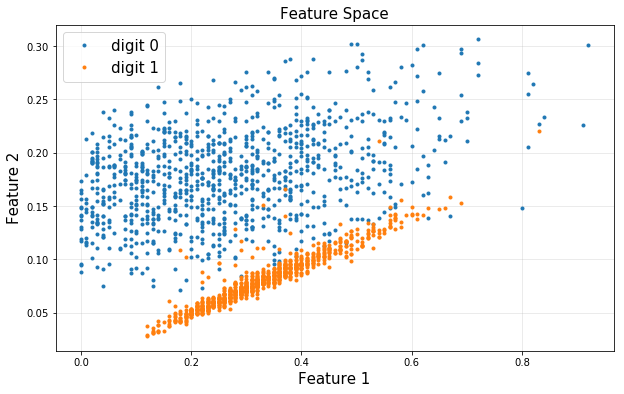

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from six.moves import cPickle

data = cPickle.load(open('C:/Users/Chris/workspace/UNIST/ML_2017-2/HW2/data.pkl', 'rb'))

data0 = data['0']
data1 = data['1']

# Convert to binary image
data0 = data0 > 125
data1 = data1 > 125

# Average pixels locaed at the center of the image
feature0_1 = np.sum(data0[:,10:20,10:20], axis=(1, 2)).reshape(-1, 1)/100 # data0[:, 1:20, 10:20] 3차원 > axis = 0, 1, 2
feature1_1 = np.sum(data1[:,10:20,10:20], axis=(1, 2)).reshape(-1, 1)/100

# Total average pixels over the entire location
feature0_2 = np.sum(data0, axis=(1, 2)).reshape(-1, 1)/(28*28)
feature1_2 = np.sum(data1, axis=(1, 2)).reshape(-1, 1)/(28*28)

plt.figure(figsize=(10, 6))
plt.title('Feature Space', fontsize=15)
plt.plot(feature0_1, feature0_2, '.', label='digit 0')
plt.plot(feature1_1, feature1_2, '.', label='digit 1')
plt.grid(alpha=0.3)
plt.legend(fontsize=15)
plt.xlabel('Feature 1', fontsize=15)
plt.ylabel('Feature 2', fontsize=15)
plt.show()

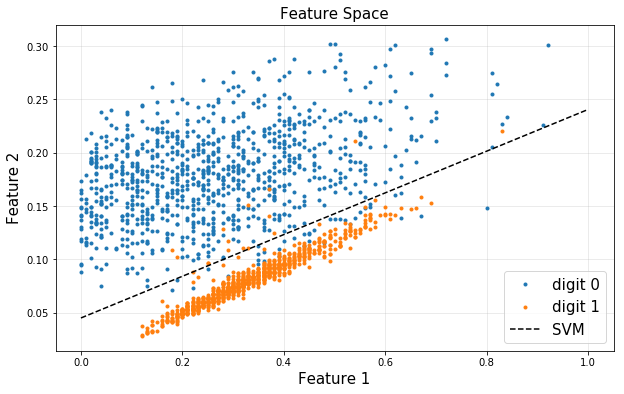

In [48]:
import cvxpy as cvx

X0 = np.hstack([np.ones([data0.shape[0], 1]), feature0_1, feature0_2]) # (1000, 1) * 3; 문제에서의 X.T
X1 = np.hstack([np.ones([data1.shape[0], 1]), feature1_1, feature1_2]) # 문제에서의 Y.T
X = np.vstack([X0, X1]) # (1000, 3) vertical stack
X = np.asmatrix(X)

y = np.vstack([np.ones([1000, 1]), -np.ones([1000, 1])])
y = np.asmatrix(y)

g = 1

w = cvx.Variable(3, 1)
u = cvx.Variable(1000, 1)
v = cvx.Variable(1000, 1)

obj = cvx.Minimize(cvx.norm(w, 2) + g*(np.ones([1, 1000])*u + np.ones([1, 1000])*v)) # objective function 그대로 표현
const = [X0*w >= 1-u, X1*w <= -(1-v), u >= 0, v >= 0 ] # s.t. 그대로 list 형태로 입력
prob = cvx.Problem(obj, const).solve()

w = w.value

xp = np.linspace(0, 1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]

plt.figure(figsize=(10, 6))
plt.title('Feature Space', fontsize=15)
plt.plot(feature0_1, feature0_2, '.', label='digit 0')
plt.plot(feature1_1, feature1_2, '.', label='digit 1')
plt.plot(xp, yp, '--',c='k', label='SVM') # defualt는 실선
plt.plot()
plt.grid(alpha=0.3)
plt.legend(fontsize=15)
plt.xlabel('Feature 1', fontsize=15)
plt.ylabel('Feature 2', fontsize=15)
plt.show()

-------------------------------------------------------

## Problem 3

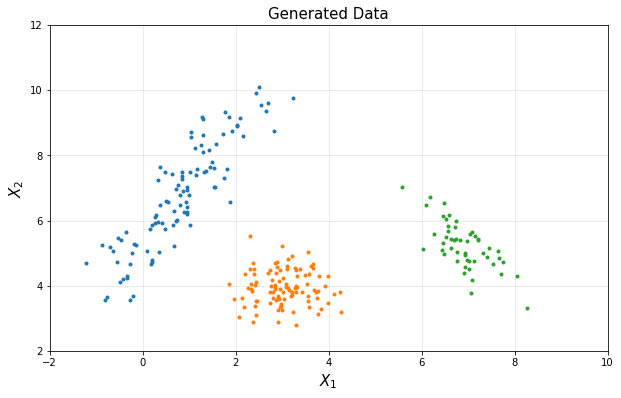

In [49]:
import numpy as np
import matplotlib.pyplot as plt

## generate three simulated clusters

mu1 = np.array([1, 7])
SIGMA1 = 0.8*np.array([[1, 1.5],
                       [1.5, 3]])
X1 = np.random.multivariate_normal(mu1, SIGMA1, 100) # (mean, cov[, size, check_valid, tol])

mu2 = np.array([3, 4])
SIGMA2 = 0.3*np.array([[1, 0],
                       [0, 1]])
X2 = np.random.multivariate_normal(mu2, SIGMA2, 100)

mu3 = np.array([7, 5])
SIGMA3 = 0.3*np.array([[1, -1],
                       [-1, 2]])
X3 = np.random.multivariate_normal(mu3, SIGMA3, 50)

plt.figure(figsize=(10, 6))
plt.title('Generated Data', fontsize=15)
plt.plot(X1[:,0], X1[:,1], '.')
plt.plot(X2[:,0], X2[:,1], '.')
plt.plot(X3[:,0], X3[:,1], '.')
plt.xlabel('$X_1$', fontsize=15)
plt.ylabel('$X_2$', fontsize=15)
plt.grid(alpha=0.3)
plt.axis([-2, 10, 2, 12])
plt.show()

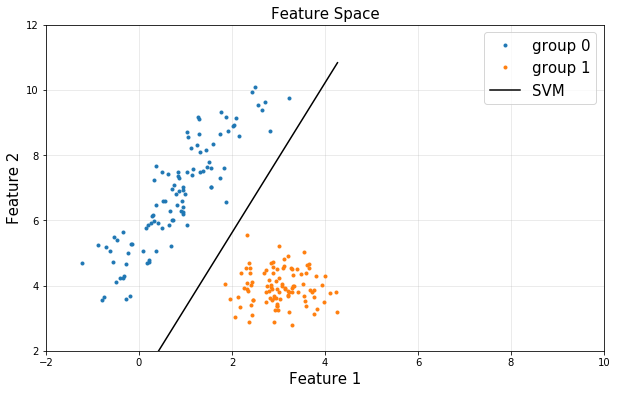

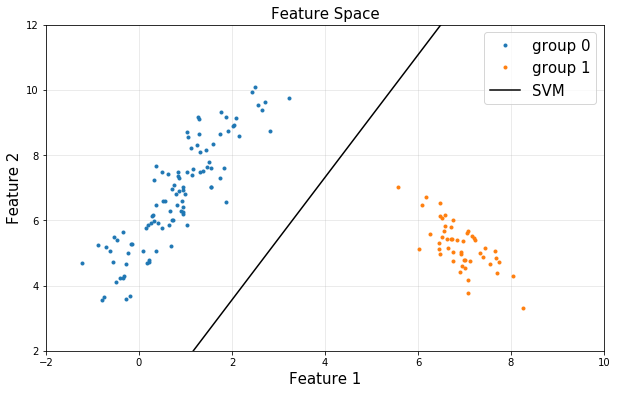

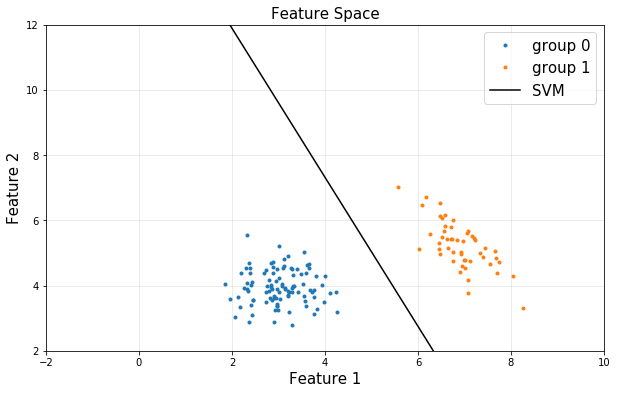

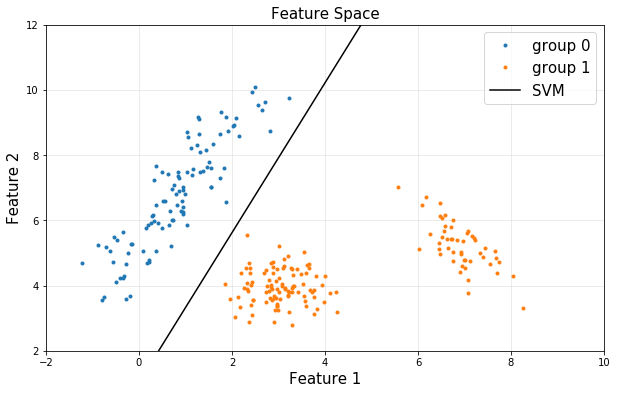

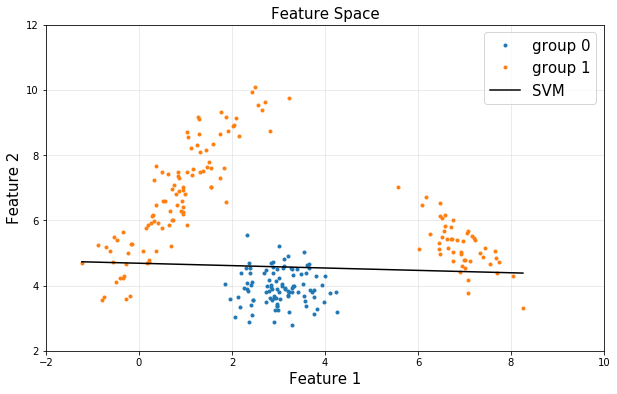

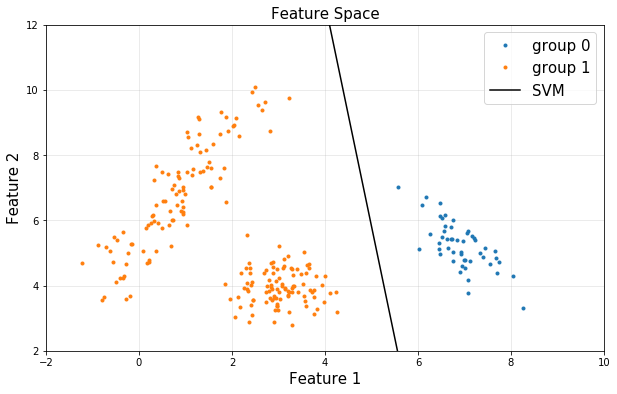

In [61]:
import cvxpy as cvx

def my_svm(data0, data1):
    X0_shape = data0.shape[0]
    X1_shape = data1.shape[0]
    
    X0 = np.hstack([np.ones([X0_shape, 1]), data0])
    X1 = np.hstack([np.ones([X1_shape, 1]), data1])
    X = np.vstack([X0, X1]) # X는 Vertical stack이므로 각각의 data set의 갯수가 달라도 영향 없음
    X = np.asmatrix(X)

    g = 1

    w = cvx.Variable(3, 1)
    u = cvx.Variable(X0_shape, 1)
    v = cvx.Variable(X1_shape, 1)

    obj = cvx.Minimize(cvx.norm(w, 2) + g*(np.ones([1, X0_shape])*u + np.ones([1, X1_shape])*v))
    const = [X0*w >= 1-u, X1*w <= -(1-v), u >= 0, v >= 0 ]
    prob = cvx.Problem(obj, const).solve()

    w = w.value

    # Just for Plotting
    max_point = np.max(np.hstack([X0[:,1], X1[:,1]]))
    min_point = np.min(np.hstack([X0[:,1], X1[:,1]]))
    
    xp = np.linspace(min_point, max_point)
    yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]

    plt.figure(figsize=(10, 6))
    plt.title('Feature Space', fontsize=15)
    plt.plot(X0[:,1], X0[:,2], '.', label='group 0')
    plt.plot(X1[:,1], X1[:,2], '.', label='group 1')
    plt.plot(xp, yp, c='k', label='SVM')
    plt.plot()
    plt.grid(alpha=0.3)
    plt.legend(fontsize=15)
    plt.xlabel('Feature 1', fontsize=15)
    plt.ylabel('Feature 2', fontsize=15)
    plt.xlim(-2 ,10)
    plt.ylim(2, 12)
    plt.show()
    
    return w

# SVM 함수를 디자인해서 비교 셋은 직접 입력 (Approach)

# One vs. One
w_1_2 = my_svm(X1, X2)
w_1_3 = my_svm(X1, X3)
w_2_3 = my_svm(X2, X3)

# One vs. All(Rest)
w_1_23 = my_svm(X1, np.vstack([X2, X3]))
w_2_13 = my_svm(X2, np.vstack([X1, X3]))
w_3_12 = my_svm(X3, np.vstack([X1, X2]))

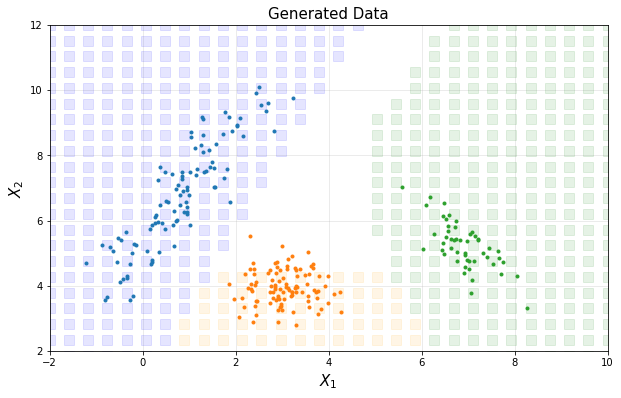

In [73]:
def class_check(x1, x2):
    point = np.array([[1, x1, x2]])
    
    # Class로 나눌 수 있는 모든 경우
    
    isClass1 = [(point*w_1_2 > 0)[0,0], (point*w_1_3 > 0)[0,0], (point*w_1_23 > 0)[0,0]]
    isClass2 = [(point*w_1_2 < 0)[0,0], (point*w_2_3 > 0)[0,0], (point*w_2_13 > 0)[0,0]]
    isClass3 = [(point*w_1_3 < 0)[0,0], (point*w_2_3 < 0)[0,0], (point*w_3_12 > 0)[0,0]]
    
    if all(x == True for x in isClass1):
        return 1
    elif all(x == True for x in isClass2):
        return 2
    elif all(x == True for x in isClass3):
        return 3
    else:
        return 0
    
plt.figure(figsize=(10, 6))
plt.xlim((-2,10))
plt.ylim((-2,12))
x1_range = np.linspace(-2, 10, 30)
x2_range = np.linspace(-2, 12, 30)

for x1 in x1_range:
    for x2 in x2_range:
        label = class_check(x1,x2)
        
        if label == 1:
            color = 'blue'
            alpha = 0.1
        elif label == 2:
            color = 'orange'
            alpha = 0.1
        elif label == 3:
            color = 'green'
            alpha = 0.1
        else:
            alpha = 0.0
        
        plt.plot(x1, x2, 's', alpha=alpha, color=color, markersize=10)

plt.title('Generated Data', fontsize=15)
plt.plot(X1[:,0], X1[:,1], '.')
plt.plot(X2[:,0], X2[:,1], '.')
plt.plot(X3[:,0], X3[:,1], '.')
plt.xlabel('$X_1$', fontsize=15)
plt.ylabel('$X_2$', fontsize=15)
plt.grid(alpha=0.3)
plt.axis([-2, 10, 2, 12])
plt.show()

-----------------------------------------

## Problem 4

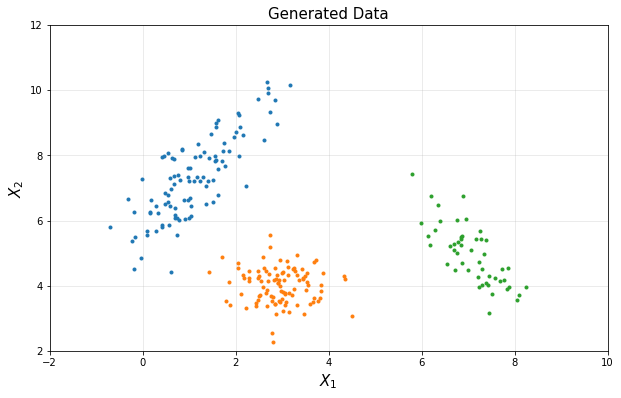

In [74]:
import numpy as np
import matplotlib.pyplot as plt

## generate three simulated clusters

mu1 = np.array([1, 7])
SIGMA1 = 0.8*np.array([[1, 1.5],
                       [1.5, 3]])
X1 = np.random.multivariate_normal(mu1, SIGMA1, 100)

mu2 = np.array([3, 4])
SIGMA2 = 0.3*np.array([[1, 0],
                       [0, 1]])
X2 = np.random.multivariate_normal(mu2, SIGMA2, 100)

mu3 = np.array([7, 5])
SIGMA3 = 0.3*np.array([[1, -1],
                       [-1, 2]])
X3 = np.random.multivariate_normal(mu3, SIGMA3, 50)

plt.figure(figsize=(10, 6))
plt.title('Generated Data', fontsize=15)
plt.plot(X1[:,0], X1[:,1], '.')
plt.plot(X2[:,0], X2[:,1], '.')
plt.plot(X3[:,0], X3[:,1], '.')
plt.xlabel('$X_1$', fontsize=15)
plt.ylabel('$X_2$', fontsize=15)
plt.grid(alpha=0.3)
plt.axis([-2, 10, 2, 12])
plt.show()

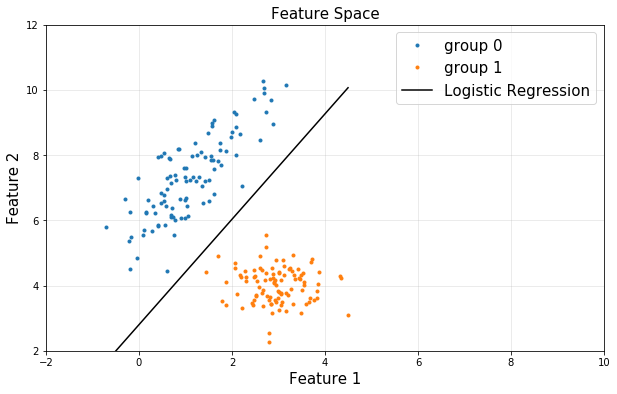

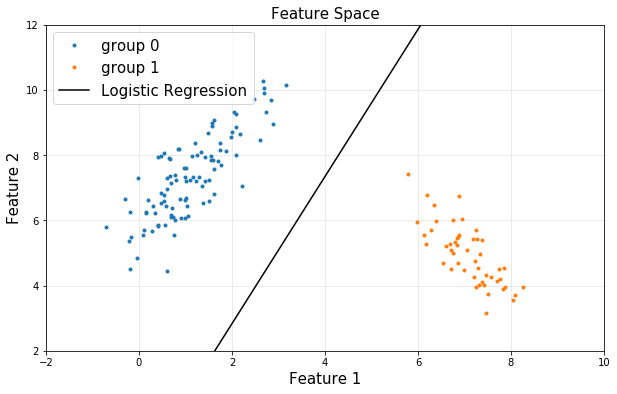

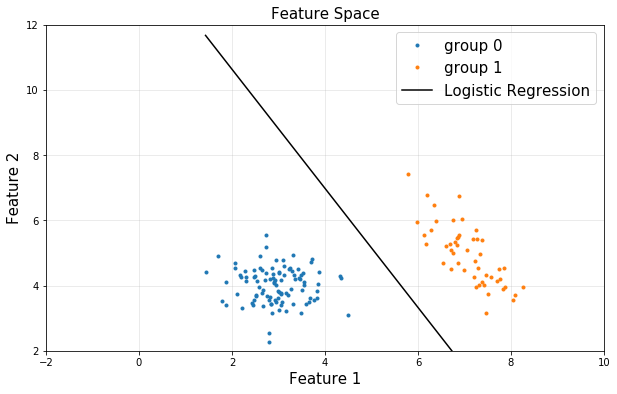

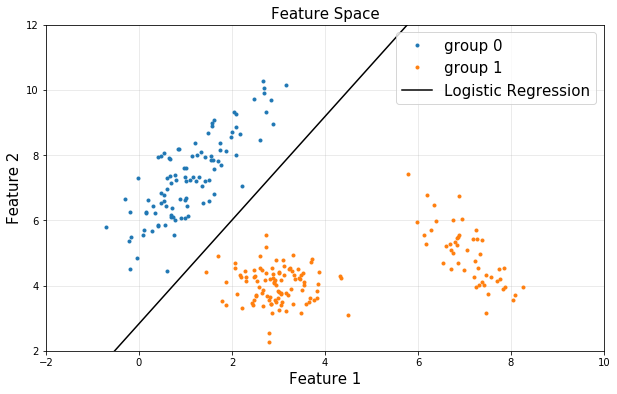

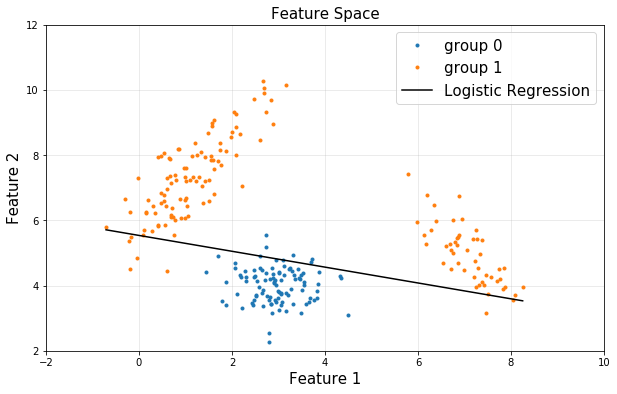

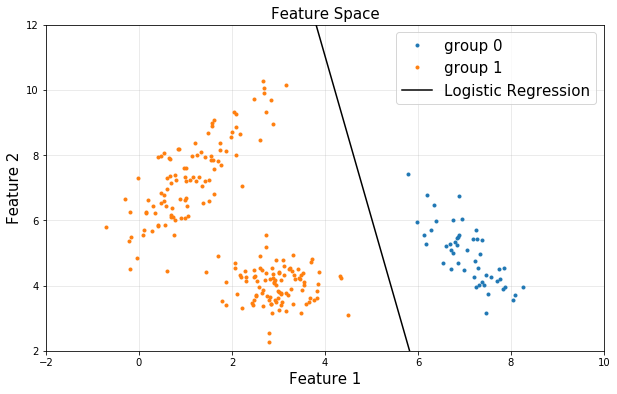

In [75]:
import cvxpy as cvx

def my_logistic_regression(data0, data1):
    X0_shape = data0.shape[0]
    X1_shape = data1.shape[0]
    
    X0 = np.hstack([np.ones([X0_shape, 1]), data0])
    X1 = np.hstack([np.ones([X1_shape, 1]), data1])
    X = np.vstack([X0, X1])
    X = np.asmatrix(X)

    y = np.vstack([np.ones([X0_shape, 1]), np.zeros([X1_shape, 1])])
    y = np.asmatrix(y)

    w = cvx.Variable(3, 1)
    u = cvx.Variable(X0_shape, 1)
    v = cvx.Variable(X1_shape, 1)

    obj = cvx.Maximize(y.T*X*w - cvx.sum_entries(cvx.logistic(X*w)))
    prob = cvx.Problem(obj).solve()

    w = w.value

    # Just for Plotting
    max_point = np.max(np.hstack([X0[:,1], X1[:,1]]))
    min_point = np.min(np.hstack([X0[:,1], X1[:,1]]))
    
    xp = np.linspace(min_point, max_point)
    yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]

    plt.figure(figsize=(10, 6))
    plt.title('Feature Space', fontsize=15)
    plt.plot(X0[:,1], X0[:,2], '.', label='group 0')
    plt.plot(X1[:,1], X1[:,2], '.', label='group 1')
    plt.plot(xp, yp, c='k', label='Logistic Regression')
    plt.plot()
    plt.grid(alpha=0.3)
    plt.legend(fontsize=15)
    plt.xlabel('Feature 1', fontsize=15)
    plt.ylabel('Feature 2', fontsize=15)
    plt.xlim(-2 ,10)
    plt.ylim(2, 12)
    plt.show()
    
    return w
    
w_1_2 = my_logistic_regression(X1, X2)
w_1_3 = my_logistic_regression(X1, X3)
w_2_3 = my_logistic_regression(X2, X3)
w_1_23 = my_logistic_regression(X1, np.vstack([X2, X3]))
w_2_13 = my_logistic_regression(X2, np.vstack([X1, X3]))
w_3_12 = my_logistic_regression(X3, np.vstack([X1, X2]))

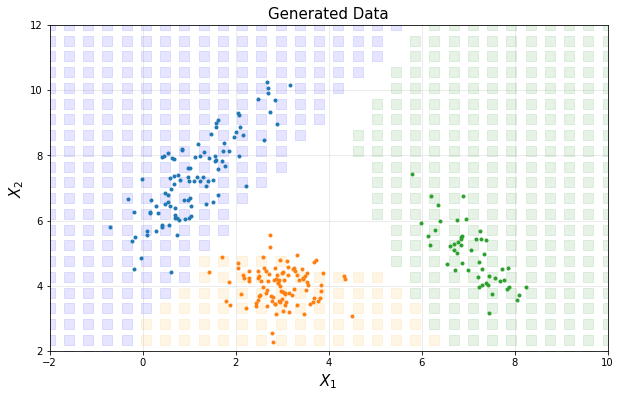

In [76]:
def class_check(x1, x2):
    point = np.array([[1, x1, x2]])
    
    isClass1 = [(point*w_1_2 > 0)[0,0], (point*w_1_3 > 0)[0,0], (point*w_1_23 > 0)[0,0]]
    isClass2 = [(point*w_1_2 < 0)[0,0], (point*w_2_3 > 0)[0,0], (point*w_2_13 > 0)[0,0]]
    isClass3 = [(point*w_1_3 < 0)[0,0], (point*w_2_3 < 0)[0,0], (point*w_3_12 > 0)[0,0]]
    
    if all(x == True for x in isClass1):
        return 1
    elif all(x == True for x in isClass2):
        return 2
    elif all(x == True for x in isClass3):
        return 3
    else:
        return 0
    
plt.figure(figsize=(10, 6))
plt.xlim((-2,10))
plt.ylim((-2,12))
x1_range = np.linspace(-2, 10, 30)
x2_range = np.linspace(-2, 12, 30)

for x1 in x1_range:
    for x2 in x2_range:
        label = class_check(x1,x2)
        
        if label == 1:
            color = 'blue'
            alpha = 0.1
        elif label == 2:
            color = 'orange'
            alpha = 0.1
        elif label == 3:
            color = 'green'
            alpha = 0.1
        else:
            alpha = 0.0
        
        plt.plot(x1, x2, 's', alpha=alpha, color=color, markersize=10)

plt.title('Generated Data', fontsize=15)
plt.plot(X1[:,0], X1[:,1], '.')
plt.plot(X2[:,0], X2[:,1], '.')
plt.plot(X3[:,0], X3[:,1], '.')
plt.xlabel('$X_1$', fontsize=15)
plt.ylabel('$X_2$', fontsize=15)
plt.grid(alpha=0.3)
plt.axis([-2, 10, 2, 12])
plt.show()